# Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks: 1. Pre-process the dataset. 2. Identify outliers. 3. Check the correlation. 4. Implement linear regression and random forest regression models. 5. Evaluate the models and compare their respective scores like R2, RMSE, etc. 

Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("uber.csv")

In [2]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# 1. Pre-process the dataset. 

In [3]:
#droping the unnecessary columns
df.drop(['Unnamed: 0','key'],inplace=True,axis=1)

In [4]:
#droping the null values
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
df.dropna(inplace=True,axis=0)

In [6]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [7]:
#converting pickup_datetime into datetime 
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [8]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


# 2. Identify outliers.


In [9]:
import seaborn as sb

C:\Users\siddh\AppData\Local\Temp\ipykernel_11128\3041956053.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['fare_amount'])


<AxesSubplot: xlabel='fare_amount', ylabel='Density'>

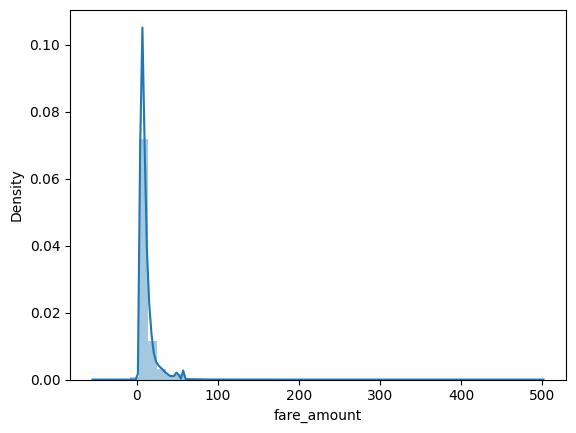

In [10]:
sb.distplot(df['fare_amount'])

C:\Users\siddh\AppData\Local\Temp\ipykernel_11128\3836235303.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['pickup_longitude'])


<AxesSubplot: xlabel='pickup_longitude', ylabel='Density'>

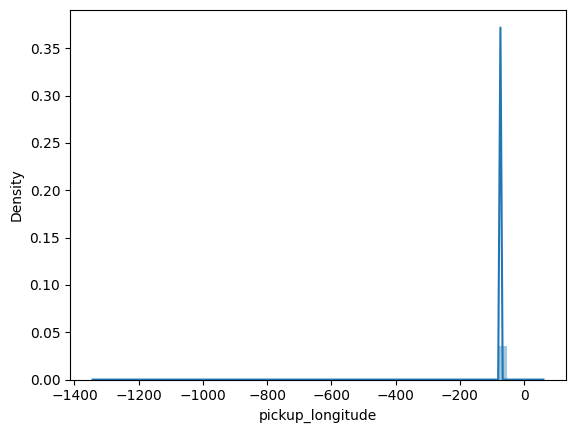

In [11]:
sb.distplot(df['pickup_longitude'])

C:\Users\siddh\AppData\Local\Temp\ipykernel_11128\1676902010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['pickup_latitude'])


<AxesSubplot: xlabel='pickup_latitude', ylabel='Density'>

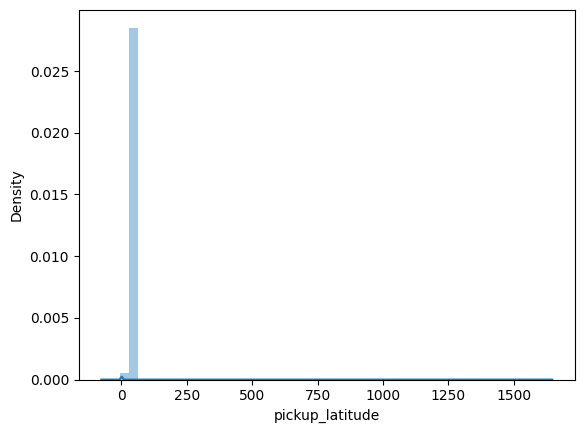

In [12]:
sb.distplot(df['pickup_latitude'])

C:\Users\siddh\AppData\Local\Temp\ipykernel_11128\1098429887.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['dropoff_latitude'])


<AxesSubplot: xlabel='dropoff_latitude', ylabel='Density'>

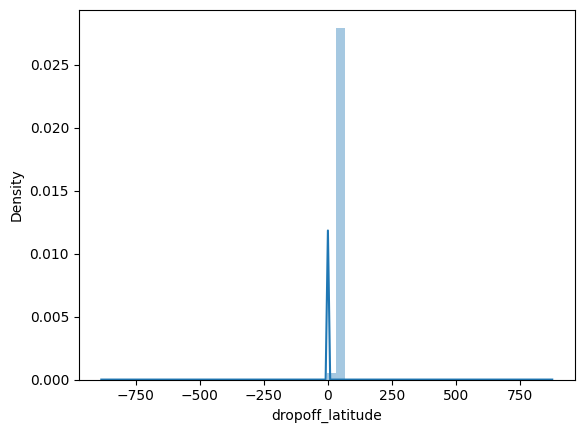

In [13]:
sb.distplot(df['dropoff_latitude'])

C:\Users\siddh\AppData\Local\Temp\ipykernel_11128\41876212.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['dropoff_longitude'])


<AxesSubplot: xlabel='dropoff_longitude', ylabel='Density'>

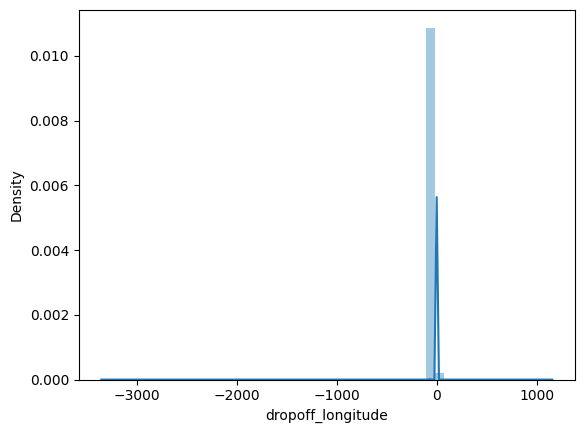

In [14]:
sb.distplot(df['dropoff_longitude'])

In [15]:
upper_limit=df['fare_amount'].mean()+3*df['fare_amount'].std()
lower_limit=df['fare_amount'].mean()-3*df['fare_amount'].std()
print("Upper Limit: ",upper_limit)
print("Lower Limit: ",lower_limit)

Upper Limit:  41.06517154773827
Lower Limit:  -18.345388448822774


In [16]:
df['fare_amount']=np.where(df['fare_amount']>upper_limit,upper_limit,np.where(df['fare_amount']<lower_limit,lower_limit,df['fare_amount']))

# 3. Check the correlation

C:\Users\siddh\AppData\Local\Temp\ipykernel_11128\3264164387.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),annot=True)


<AxesSubplot: >

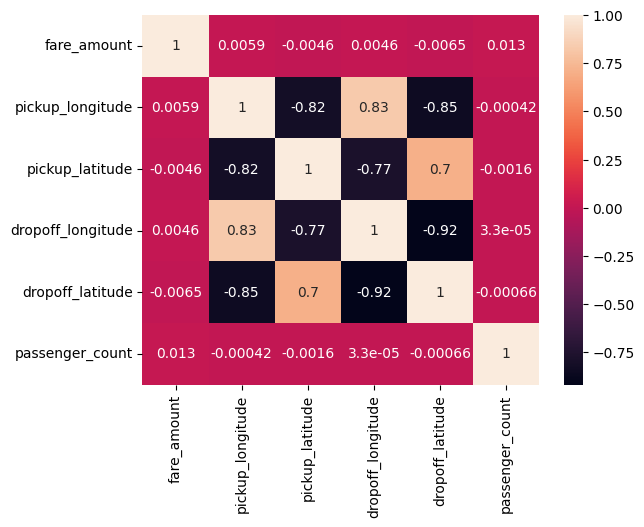

In [17]:
sb.heatmap(df.corr(),annot=True)

In [18]:
#adding more columns for better prediction
df=df.assign(hour=df.pickup_datetime.dt.hour,day=df.pickup_datetime.dt.day,month=df.pickup_datetime.dt.month,year=df.pickup_datetime.dt.year,dayofweek=df.pickup_datetime.dt.dayofweek)
df.drop(['pickup_datetime'],inplace=True,axis=1)


# 4. Implement linear regression and random forest regression models.
# 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
 

In [19]:
X=df.drop(['fare_amount'],axis=1)
Y=df['fare_amount']

In [20]:
#splilting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [22]:
y_pred=lr.predict(X_test)
y_pred

array([10.35816826, 11.48022373, 12.79482682, ..., 12.03739817,
       10.15063409,  9.97467998])

In [23]:
from sklearn import metrics
print("RMSE score for Linear Regression: ",np.sqrt(metrics.mean_squared_error(y_pred,Y_test)))

RMSE score for Linear Regression:  8.002288285378782


In [24]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(100)

In [25]:
rfModel.fit(X_train,Y_train)
y_pred=rfModel.predict(X_test)
y_pred

array([ 7.85 ,  6.095, 12.578, ...,  9.666, 11.766, 11.585])

In [26]:
print("RMSE score for Random forest Regression: ",np.sqrt(metrics.mean_squared_error(y_pred,Y_test)))

RMSE score for Random forest Regression:  3.388111744586898
